Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:08
🔁 Restarting kernel...


Homework report should include:  
1) scaling plot in log-log coordinates with description; create correct labels for scaling plot, including units of measurement; make comments on operations in cell starting with ##!!!  
2) replicates clusterization for all files (in directory for the lecture) with dendrogram and description;  make comments on operations in cells starting with ##!!!  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip uninstall matplotlib -y

In [3]:
!pip install matplotlib==3.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 152.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 120.3 MB/s eta 0:00:00


In [1]:
%%bash
pip install cooler
pip install hicrep
pip install cooltools
pip install fuc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 111.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 31.4 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5033 sha256=000ef1cb8c9ef26767bdd53e23ab5fa831218d418514c49d8f523ec38149de3e
  Stored in directory: /root/.cache/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for hicrep: filename=hicrep-0.2.6-py3-none-any.whl size=34754 sha256=15075a72668989dfc7694d67d

In [2]:
import matplotlib as mpl
mpl.__version__

'3.10.0'

In [3]:
from fuc import pybed

DistributionNotFound: The 'sorted_nearest' distribution was not found and is required by the application

In [ ]:
import cooltools.lib.plotting
from fuc import pybed

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
import numpy as np
import seaborn as sns
import pandas as pd
import hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool
import cooler
import cooltools
from cooltools import insulation
import scipy

In [5]:
mcool1 = '/content/drive/MyDrive/hiC/4DNFI4HZHGLC.mcool'
mcool2 = '/content/drive/MyDrive/hiC/4DNFIJPZ4ASS.mcool'

In [6]:
cooler.fileops.list_coolers(mcool1)

['/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [7]:
# Смотрим доступные разрешения
cooler.fileops.list_coolers(mcool2)

['/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/5000',
 '/resolutions/10000',
 '/resolutions/25000',
 '/resolutions/50000',
 '/resolutions/100000',
 '/resolutions/250000',
 '/resolutions/500000',
 '/resolutions/1000000',
 '/resolutions/2500000',
 '/resolutions/5000000',
 '/resolutions/10000000']

In [8]:
resolution = 25000
clr1 = cooler.Cooler(f'{mcool1}::resolutions/{resolution}')
resolution = 25000
clr2 = cooler.Cooler(f'{mcool2}::resolutions/{resolution}')

# Пункт а. Получить информацию и атрибуты матрицы Hi-C с помощью cooler.info

In [9]:
clr1.info



{'bin-size': np.int32(25000),
 'bin-type': 'fixed',
 'creation-date': '2024-12-06T03:22:01.510813',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': np.int64(3),
 'generated-by': 'cooler-0.9.3',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': np.int64(123541),
 'nchroms': np.int64(24),
 'nnz': np.int64(215116865),
 'storage-mode': 'symmetric-upper',
 'sum': np.int64(435653850)}

In [10]:
clr2.info

{'bin-size': np.int32(25000),
 'bin-type': 'fixed',
 'creation-date': '2025-01-06T11:18:38.237465',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': np.int64(3),
 'generated-by': 'cooler-0.9.3',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': np.int64(123541),
 'nchroms': np.int64(24),
 'nnz': np.int64(131881791),
 'storage-mode': 'symmetric-upper',
 'sum': np.int64(569592662)}

Tasks for seminar:   
1) get info and attributes of Hi-C matrix with cooler.info  
2) open cooler object as balanced matrix for intrachromosomal contacts   
3) open cooler as unbalanced matrix for interchromosomal contacts  
4) get table with coordinates and contacts, are they raw or balanced?  
5) get the table in command line with command *cooler dump*  
6) look at the table with bins, which columns present there?  
7) plot a piece of map (log)  
8) scaling plot  (in log - log coordinates)  
9) replicates clusterization



In [11]:
#узнаем доступные хромосомы   и свераем по картинке
clr1.chromnames

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrX',
 'chrY']

 # Пункт b. Открыть объект cooler как сбалансированную матрицу для внутрихромосомных контактов


In [12]:
'weight' in clr1.bins().columns

True

In [13]:
'weight' in clr2.bins().columns

True

In [14]:
start = 44_800_000
end = start + 1_200_000
region = ('chr7', start, end)
m1 = clr1.matrix(as_pixels=True, balance=True).fetch(region)
start = 68_000_000
end = start + 1_000_000
region = ('chr7', start, end)
m2 = clr2.matrix(as_pixels=True, balance=True).fetch(region)

# Пункт C. Получить таблицу с координатами и контактами, они сбалансированные или нет?

In [15]:
m1

,bin1_id,bin2_id,count,balanced
0,51075,51075,1165,0.110995
1,51075,51076,311,0.031886
2,51075,51077,146,0.014928
3,51075,51078,127,0.012182
4,51075,51079,136,0.012017
...,...,...,...,...
1151,51120,51121,87,0.016684
1152,51120,51122,56,0.010387
1153,51121,51121,590,0.102844
1154,51121,51122,127,0.021413


In [16]:
#все значения частот конткатов
m2

,bin1_id,bin2_id,count,balanced
0,52003,52003,1699,0.302471
1,52003,52004,578,0.099203
2,52003,52005,178,0.027472
3,52003,52006,103,0.022100
4,52003,52007,87,0.016362
...,...,...,...,...
815,52040,52041,556,0.093158
816,52040,52042,205,0.037542
817,52041,52041,2291,0.323410
818,52041,52042,642,0.099055


Да, они сбалансирована

In [17]:
start = 108_649_858
end = start + 1_000_000
region = ('chr7', start, end)
matr1 = clr1.matrix(balance=True).fetch(region)
start = 108_649_858
end = start + 1_000_000
region = ('chr7', start, end)
matr2 = clr2.matrix(balance=True).fetch(region)

<ipython-input-18-072d49b538a0>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(matr1),cmap='coolwarm')


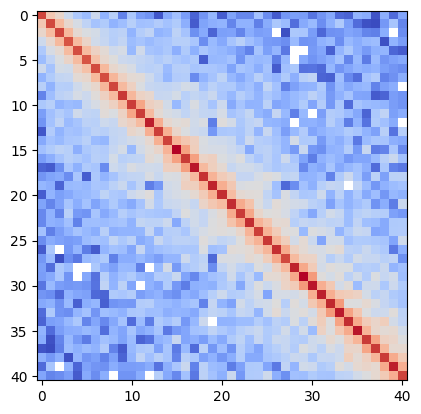

In [18]:
plt.imshow(np.log(matr1),cmap='coolwarm')

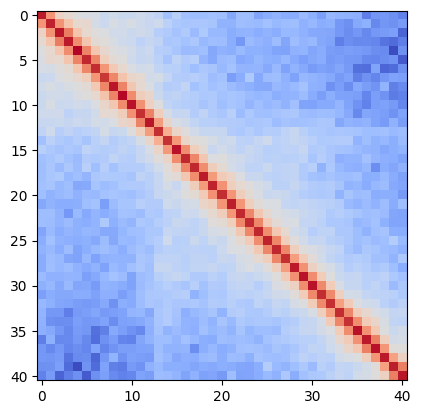

In [19]:
plt.imshow(np.log(matr2),cmap='coolwarm')

# Пункь d. Получить таблицу в командной строке командой *cooler dump*

In [20]:
! cooler dump -b -t pixels --header --join -r chr7:108,649,858-109,649,858 /content/drive/MyDrive/hiC/4DNFI4HZHGLC.mcool::resolutions/25000 | head

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr7	108625000	108650000	chr7	108625000	108650000	379	0.12231
chr7	108625000	108650000	chr7	108650000	108675000	59	0.0166232
chr7	108625000	108650000	chr7	108675000	108700000	35	0.010963
chr7	108625000	108650000	chr7	108700000	108725000	20	0.00556291
chr7	108625000	108650000	chr7	108725000	108750000	10	0.00294867
chr7	108625000	108650000	chr7	108750000	108775000	8	0.00213395
chr7	108625000	108650000	chr7	108775000	108800000	17	0.00538057
chr7	108625000	108650000	chr7	108800000	108825000	6	0.00174578
chr7	108625000	108650000	chr7	108825000	108850000	11	0.00361304


In [21]:
! cooler dump -b -t pixels --header --join -r chr7:108,649,858-109,649,858  /content/drive/MyDrive/hiC/4DNFIJPZ4ASS.mcool::resolutions/25000 | head

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr7	108625000	108650000	chr7	108625000	108650000	1761	0.297519
chr7	108625000	108650000	chr7	108650000	108675000	496	0.0853431
chr7	108625000	108650000	chr7	108675000	108700000	166	0.0274573
chr7	108625000	108650000	chr7	108700000	108725000	140	0.0223216
chr7	108625000	108650000	chr7	108725000	108750000	106	0.0186621
chr7	108625000	108650000	chr7	108750000	108775000	115	0.0170557
chr7	108625000	108650000	chr7	108775000	108800000	110	0.0160993
chr7	108625000	108650000	chr7	108800000	108825000	90	0.0129699
chr7	108625000	108650000	chr7	108825000	108850000	89	0.0145732


# Пункт e. посмотрите таблицу с бинами, какие столбцы там присутствуют?

In [22]:
#мтарица контактов для отдельных бинов
pix1=clr1.pixels()[:]

In [23]:
pix1

,bin1_id,bin2_id,count
0,0,6680,1
1,0,42477,1
2,0,44196,1
3,0,61481,1
4,0,72380,1
...,...,...,...
215116860,123524,123525,202
215116861,123524,123526,18
215116862,123525,123525,361
215116863,123525,123526,22


In [24]:
pix2=clr2.pixels()[:]

In [25]:
pix2

,bin1_id,bin2_id,count
0,0,36310,1
1,0,48840,1
2,0,66705,1
3,0,100730,1
4,1,106196,1
...,...,...,...
131881786,123524,123525,560
131881787,123524,123526,33
131881788,123525,123525,1178
131881789,123525,123526,83


In [26]:
bins1=clr1.bins()[:] # координаты бинов и вес

In [27]:
bins1

,chrom,start,end,KR,VC,VC_SQRT,weight
0,chr1,0,25000,NaN,0.000256,0.013549,NaN
1,chr1,25000,50000,NaN,0.000000,0.000000,NaN
2,chr1,50000,75000,0.028477,0.003844,0.052474,NaN
3,chr1,75000,100000,0.035277,0.006407,0.067744,NaN
4,chr1,100000,125000,NaN,0.000513,0.019161,NaN
...,...,...,...,...,...,...,...
123536,chrY,57125000,57150000,NaN,0.000000,0.000000,NaN
123537,chrY,57150000,57175000,NaN,0.000000,0.000000,NaN
123538,chrY,57175000,57200000,NaN,0.000000,0.000000,NaN
123539,chrY,57200000,57225000,NaN,0.000000,0.000000,NaN


In [28]:
bins2=clr2.bins()[:] # координаты бинов и  их вес

In [29]:
bins2

,chrom,start,end,KR,VC,VC_SQRT,weight
0,chr1,0,25000,NaN,0.000000,0.000000,NaN
1,chr1,25000,50000,NaN,0.000000,0.000000,NaN
2,chr1,50000,75000,0.029044,0.002972,0.031388,NaN
3,chr1,75000,100000,0.080204,0.020804,0.083046,NaN
4,chr1,100000,125000,0.016101,0.002547,0.029060,NaN
...,...,...,...,...,...,...,...
123536,chrY,57125000,57150000,NaN,0.000000,0.000000,NaN
123537,chrY,57150000,57175000,NaN,0.000000,0.000000,NaN
123538,chrY,57175000,57200000,NaN,0.000000,0.000000,NaN
123539,chrY,57200000,57225000,NaN,0.000000,0.000000,NaN


# Пункт f. Постройте кривые зависимости число контактов от расстояния для выбранной хромосомы (в логарифмических-координатах). Сравните их.



<ipython-input-30-f78fc5e85726>:3: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m1,i))
<ipython-input-30-f78fc5e85726>:7: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m2,i))


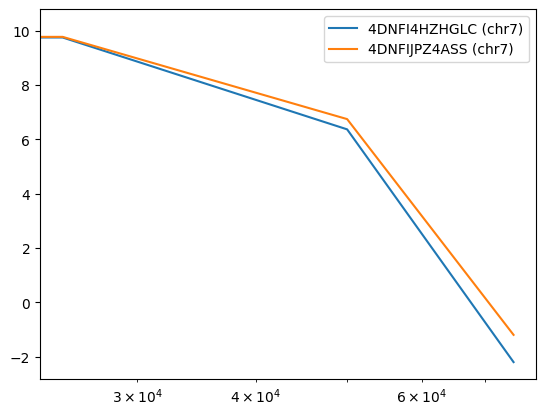

In [30]:
z=np.zeros(len(m1))
for i in range(len(m1)):
  z[i]=np.nanmean(np.diagonal(m1,i))
plt.plot(np.arange(len(m1))*25000,np.log(z),label='4DNFI4HZHGLC (chr7)')
z=np.zeros(len(m2))
for i in range(len(m2)):
  z[i]=np.nanmean(np.diagonal(m2,i))
plt.plot(np.arange(len(m2))*25000,np.log(z),label='4DNFIJPZ4ASS (chr7)')
plt.xscale('log')
plt.legend()

 **4DNFI4HZHGLC**  chr3 - Более высокая контактная частота                           
**4DNFIJPZ4ASS** Ниже уровни контактов, резкий спад при больших расстояниях |


# Пункт g-h. для выбранного участка найдите insulation score и границы тадов для обоих файлов





In [31]:
import cooltools
from cooltools import insulation
windows = [2*resolution,3*resolution,5*resolution]
insulation_table1 = insulation(clr1, windows, verbose=True)


INFO:root:fallback to serial implementation.
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY


In [32]:
insulation_table1[36:3000]


,chrom,start,end,region,is_bad_bin,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_75000,n_valid_pixels_75000,log2_insulation_score_125000,n_valid_pixels_125000,boundary_strength_50000,boundary_strength_75000,boundary_strength_125000,is_boundary_50000,is_boundary_75000,is_boundary_125000
36,chr1,900000,925000,chr1,False,0.547676,1.0,0.442903,6.0,0.349669,22.0,NaN,NaN,NaN,False,False,False
37,chr1,925000,950000,chr1,False,0.910906,1.0,0.720237,6.0,0.468912,22.0,NaN,NaN,NaN,False,False,False
38,chr1,950000,975000,chr1,False,0.680636,1.0,0.794839,6.0,0.623563,22.0,0.230271,NaN,NaN,False,False,False
39,chr1,975000,1000000,chr1,False,0.810687,1.0,0.703706,6.0,0.705803,22.0,NaN,0.091132,NaN,False,False,False
40,chr1,1000000,1025000,chr1,False,0.911849,1.0,0.788146,6.0,0.740339,22.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,chr1,74875000,74900000,chr1,False,-0.253230,1.0,-0.349859,6.0,-0.483531,22.0,NaN,NaN,NaN,False,False,False
2996,chr1,74900000,74925000,chr1,False,-0.019313,1.0,-0.039172,6.0,-0.315468,22.0,NaN,NaN,NaN,False,False,False
2997,chr1,74925000,74950000,chr1,False,0.300089,1.0,-0.017531,6.0,-0.300962,22.0,NaN,NaN,NaN,False,False,False
2998,chr1,74950000,74975000,chr1,False,-0.248225,1.0,-0.019164,6.0,-0.268631,22.0,0.397335,NaN,NaN,False,False,False


In [33]:
insulation_table2 = insulation(clr2, windows, verbose=True)

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY


In [34]:
insulation_table2[36:3000]

,chrom,start,end,region,is_bad_bin,log2_insulation_score_50000,n_valid_pixels_50000,log2_insulation_score_75000,n_valid_pixels_75000,log2_insulation_score_125000,n_valid_pixels_125000,boundary_strength_50000,boundary_strength_75000,boundary_strength_125000,is_boundary_50000,is_boundary_75000,is_boundary_125000
36,chr1,900000,925000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
37,chr1,925000,950000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
38,chr1,950000,975000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
39,chr1,975000,1000000,chr1,True,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
40,chr1,1000000,1025000,chr1,False,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,chr1,74875000,74900000,chr1,False,0.247728,1.0,0.182683,6.0,0.299666,22.0,NaN,NaN,NaN,False,False,False
2996,chr1,74900000,74925000,chr1,False,0.287893,1.0,0.138743,6.0,0.240303,22.0,NaN,NaN,NaN,False,False,False
2997,chr1,74925000,74950000,chr1,False,-0.064792,1.0,0.090852,6.0,0.185352,22.0,0.230099,0.035894,NaN,False,False,False
2998,chr1,74950000,74975000,chr1,False,-0.055581,1.0,0.106962,6.0,0.112550,22.0,NaN,NaN,NaN,False,False,False


In [35]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

(108649858.0, 109649858.0)

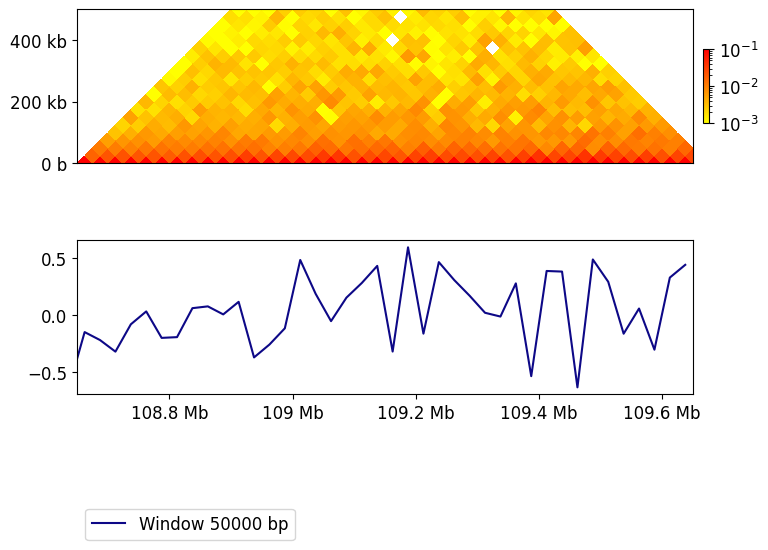

In [36]:
plt.rcParams['font.size'] = 12

start = 108_649_858
end = start + 1_000_000
region = ('chr7', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr1.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='autumn_r')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table1, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(108649858.0, 109649858.0)

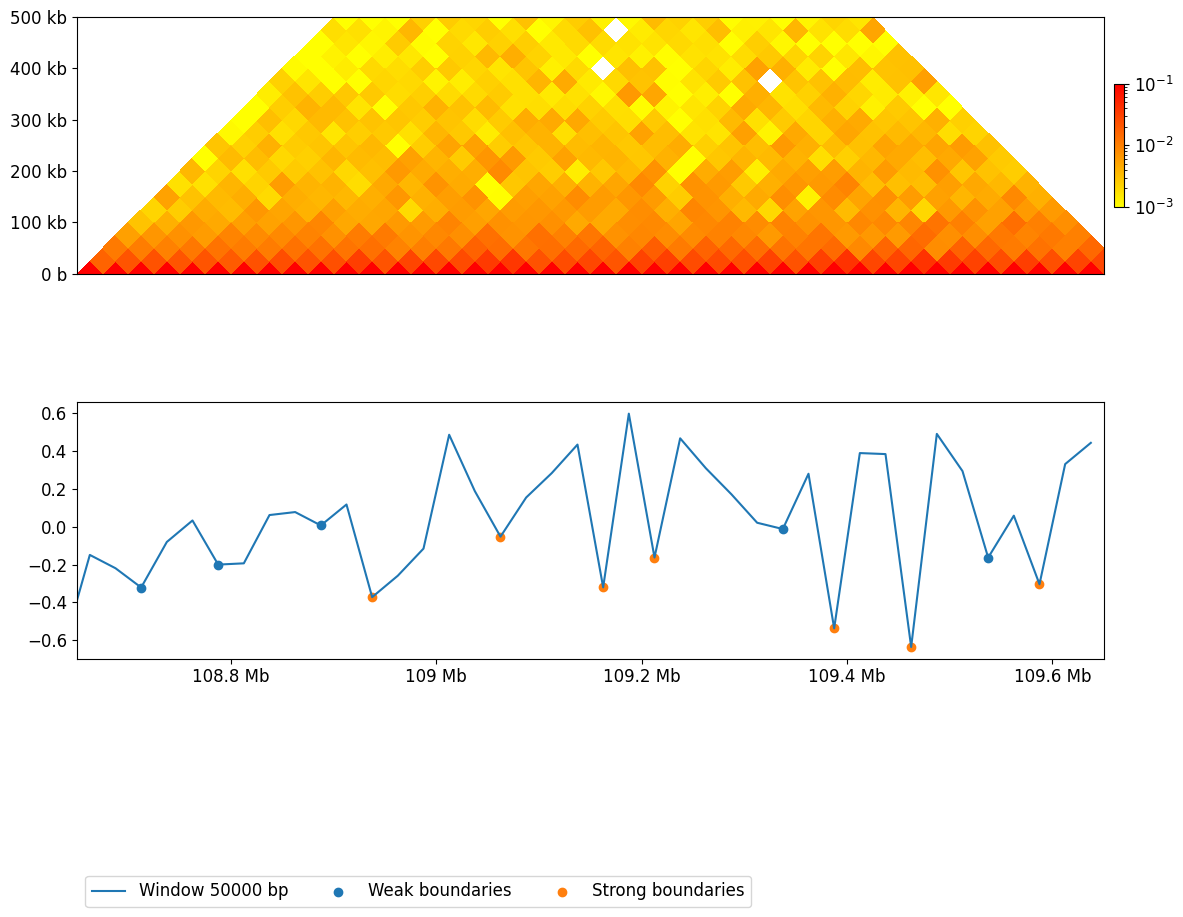

In [37]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='autumn_r')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table1, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries1 = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries1 = boundaries1[~boundaries1[f'is_boundary_{windows[0]}']]
strong_boundaries1 = boundaries1[boundaries1[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries1[['start', 'end']].mean(axis=1),
            weak_boundaries1[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries1[['start', 'end']].mean(axis=1),
            strong_boundaries1[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

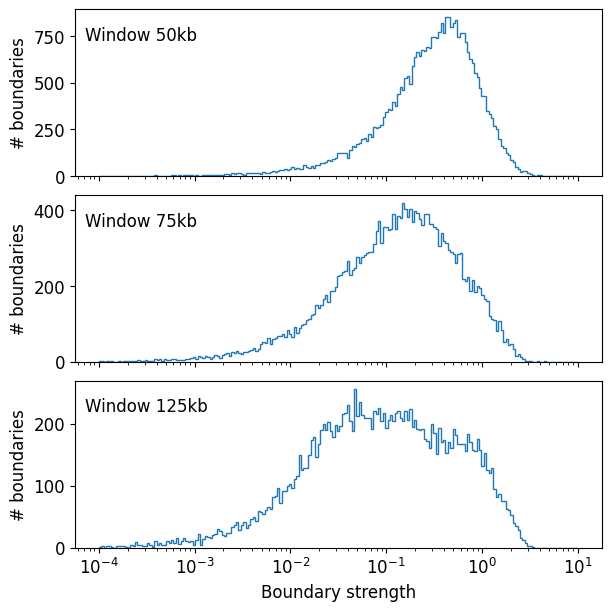

In [38]:
histkwargs = dict(
    bins=10**np.linspace(-4,1,200),
    histtype='step',
    lw=2,
)

f, axs = plt.subplots(len(windows),1, sharex=True, figsize=(6,6), constrained_layout=True)
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table1[f'boundary_strength_{w}'],
        **histkwargs
    )
    ax.text(0.02, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength');

[Text(0.5, 0, 'Boundary strength')]

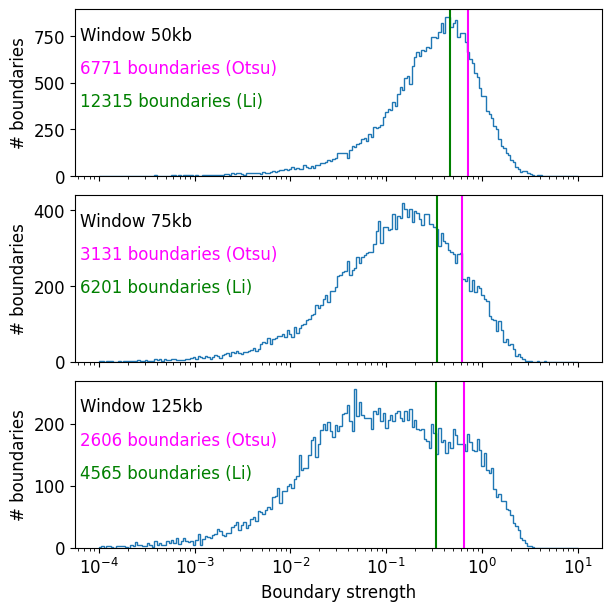

In [39]:
from skimage.filters import threshold_li, threshold_otsu

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table1[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table1[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table1[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table1[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table1[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

(108649858.0, 109649858.0)

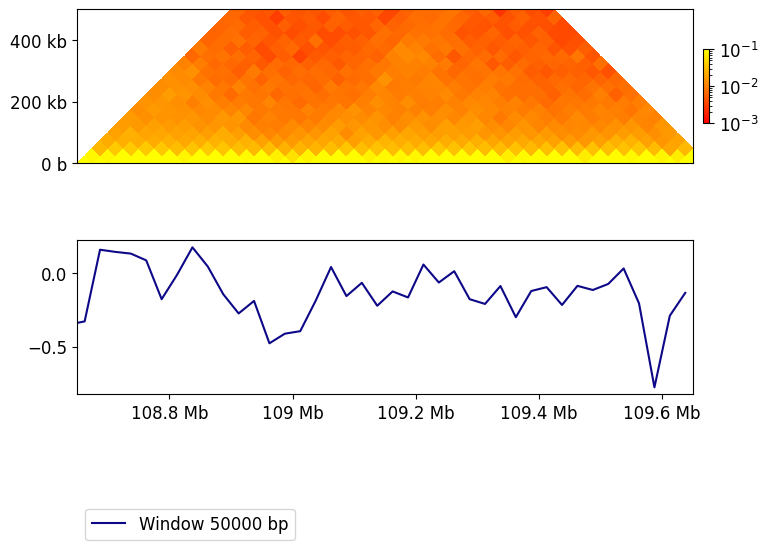

In [40]:
plt.rcParams['font.size'] = 12

region = ('chr7', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr2.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='autumn')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table2, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(108649858.0, 109649858.0)

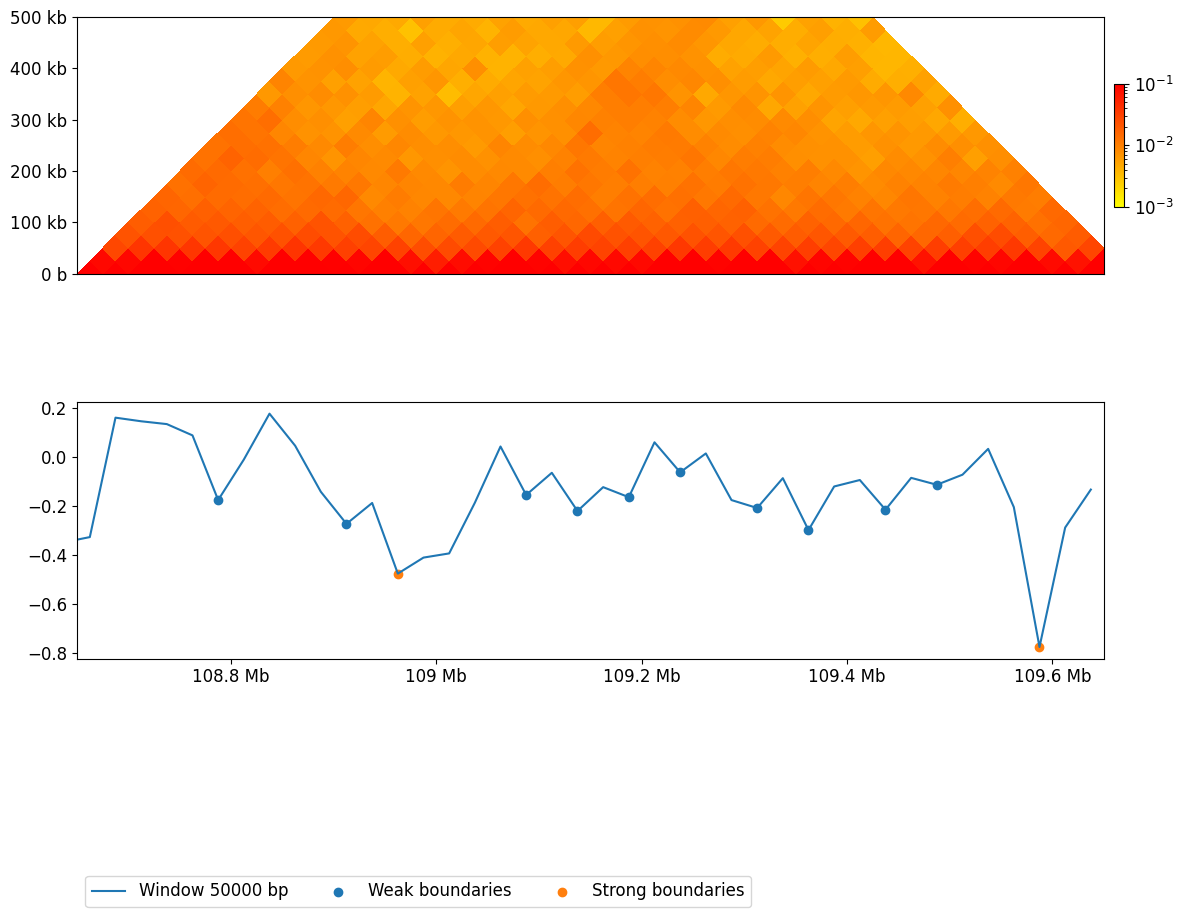

In [41]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='autumn_r')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table2, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries2 = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries2 = boundaries2[~boundaries2[f'is_boundary_{windows[0]}']]
strong_boundaries2 = boundaries2[boundaries2[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries2[['start', 'end']].mean(axis=1),
            weak_boundaries2[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries2[['start', 'end']].mean(axis=1),
            strong_boundaries2[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

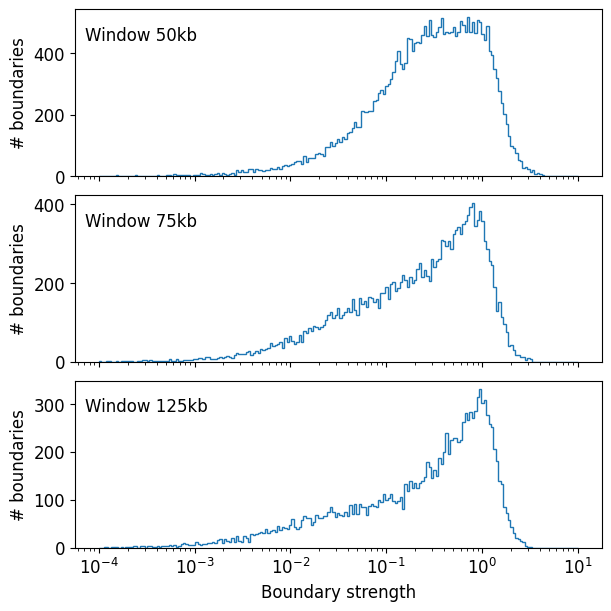

In [42]:
histkwargs = dict(
    bins=10**np.linspace(-4,1,200),
    histtype='step',
    lw=2,
)

f, axs = plt.subplots(len(windows),1, sharex=True, figsize=(6,6), constrained_layout=True)
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table2[f'boundary_strength_{w}'],
        **histkwargs
    )
    ax.text(0.02, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength');

[Text(0.5, 0, 'Boundary strength')]

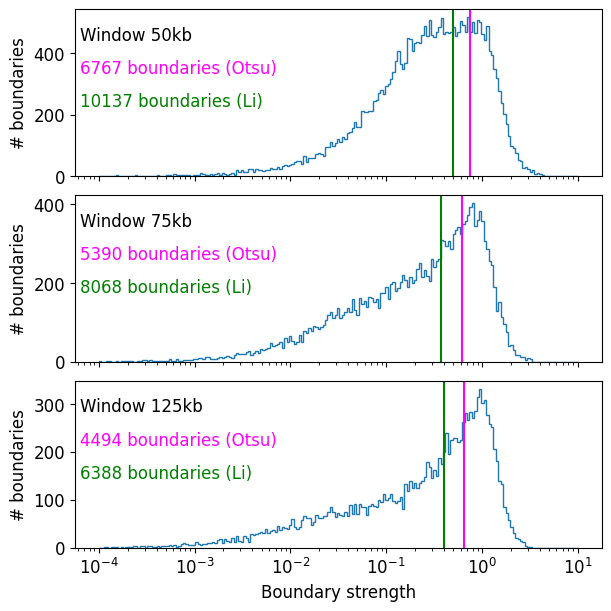

In [43]:
from skimage.filters import threshold_li, threshold_otsu

f, axs = plt.subplots(len(windows), 1, sharex=True, figsize=(6,6), constrained_layout=True)
thresholds_li = {}
thresholds_otsu = {}
for i, (w, ax) in enumerate(zip(windows, axs)):
    ax.hist(
        insulation_table2[f'boundary_strength_{w}'],
        **histkwargs
    )
    thresholds_li[w] = threshold_li(insulation_table2[f'boundary_strength_{w}'].dropna().values)
    thresholds_otsu[w] = threshold_otsu(insulation_table2[f'boundary_strength_{w}'].dropna().values)
    n_boundaries_li = (insulation_table2[f'boundary_strength_{w}'].dropna()>=thresholds_li[w]).sum()
    n_boundaries_otsu = (insulation_table2[f'boundary_strength_{w}'].dropna()>=thresholds_otsu[w]).sum()
    ax.axvline(thresholds_li[w], c='green')
    ax.axvline(thresholds_otsu[w], c='magenta')
    ax.text(0.01, 0.9,
             f'Window {w//1000}kb',
             ha='left',
             va='top',
             transform=ax.transAxes)
    ax.text(0.01, 0.7,
            f'{n_boundaries_otsu} boundaries (Otsu)',
            c='magenta',
            ha='left',
            va='top',
            transform=ax.transAxes)
    ax.text(0.01, 0.5,
            f'{n_boundaries_li} boundaries (Li)',
            c='green',
            ha='left',
            va='top',
            transform=ax.transAxes)

    ax.set(
        xscale='log',
        ylabel='# boundaries'
    )

axs[-1].set(xlabel='Boundary strength')

In [44]:
import sys
print("Python executable:", sys.executable)
!which pip
!pip show ncls

Python executable: /usr/bin/python3.real
/usr/local/bin/pip
Name: ncls
Version: 0.0.68
Summary: A fast interval tree-like implementation in C, wrapped for the Python ecosystem.
Home-page: http://github.com/pyranges/ncls
Author: 
Author-email: Endre Bakken Stovner <endbak@pm.me>
License: MIT
Location: /usr/local/lib/python3.11/site-packages
Requires: numpy
Required-by: pyranges


In [45]:
!/usr/bin/python3.real -m pip install ncls


  Using cached ncls-0.0.68-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.6 kB)
Using cached ncls-0.0.68-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.5 MB)


In [46]:
from fuc import pybed

In [47]:
bound1 = boundaries1.rename(columns={'boundary_strength_50000' : 'score'})
bound2 = boundaries2.rename(columns={'boundary_strength_50000' : 'score'})
bound1 = bound1.drop(['region', 'is_bad_bin',	'log2_insulation_score_50000',	'n_valid_pixels_50000', 'is_boundary_50000'], axis = 1)
bound2 = bound2.drop(['region', 'is_bad_bin',	'log2_insulation_score_50000',	'n_valid_pixels_50000', 'is_boundary_50000'], axis = 1)
bound1 = bound1.rename(columns={'chrom' : 'Chromosome', 'start' : 'Start', 'end' : 'End'})
bound2 = bound2.rename(columns={'chrom' : 'Chromosome', 'start' : 'Start', 'end' : 'End'})
bf1 = pybed.BedFrame.from_frame(meta = ['Chromosome', 'Start', 'End', 'Score'], data=bound1)
bf2 = pybed.BedFrame.from_frame(meta = ['Chromosome', 'Start', 'End', 'Score'], data=bound2)
bf1.to_file('tads1.bed')
bf2.to_file('tads2.bed')
!head tads1.bed

Chromosome
Start
End
Score
chr7	108625000	108650000	-0.7145674309794952	6.0	-1.0159981352575946	22.0	0.044394147193557054			False	False
chr7	108700000	108725000	-0.27433260736102666	6.0	-0.4824480049026862	22.0	0.17202500253409875			False	False
chr7	108775000	108800000	-0.08466864741787185	6.0	-0.21342151322912267	22.0	0.23282918354785093			False	False
chr7	108875000	108900000	0.015522451342922973	6.0	-0.060379196120428316	22.0	0.07056240282572335	0.009416981162616503		False	False
chr7	108925000	108950000	-0.08396622141163315	6.0	-0.06182709523129337	22.0	0.4889425937655842			False	False
chr7	109050000	109075000	0.1302872249704534	6.0	0.07164254215336863	22.0	0.4858939259408938	0.08854335261968757	0.07210752475649213	False	False
